In [1]:
import pandas as pd
import numpy as np
counts = pd.read_csv( "C:\\Users\\HP\\Downloads\\fremont_hourly.csv", index_col='Date', parse_dates=True)
weather = pd.read_csv("C:\\Users\\HP\\Downloads\\599021.csv", index_col='DATE', parse_dates=True)
counts
weather
                      

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT14,WT01,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,233,89,30,40,30,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,178,100,41,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,78,73,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,83,65,20,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,217,89,57,360,360,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,100,34,210,200,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2014-05-29,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,111,43,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2014-05-30,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,206,89,45,340,350,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [2]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]
daily

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0
...,...
2018-06-26,4771.0
2018-06-27,4942.0
2018-06-28,4387.0


In [3]:
days=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
for i in range(7):
    daily[days[i]]=(daily.index.dayofweek == i).astype(float)
daily

,Total,Mon,Tue,Wed,Thur,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2018-06-26,4771.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-06-27,4942.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-06-28,4387.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)
daily

,Total,Mon,Tue,Wed,Thur,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-06-26,4771.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-27,4942.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-06-28,4387.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
   """Compute the hours of daylight for the given date"""
days = (date - pd.datetime(2000, 12, 21)).days
m = (1. - np.tan(np.radians(latitude))
* np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

NameError: name 'date' is not defined

In [6]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily

,Total,Mon,Tue,Wed,Thur,Fri,Sat,Sun,holiday,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.85,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-26,4771.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-06-27,4942.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-06-28,4387.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [7]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
daily.head()

,Total,Mon,Tue,Wed,Thur,Fri,Sat,Sun,holiday,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.85,1.0,0.010959


In [14]:
column_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun', 'holiday', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']
from sklearn.linear_model import LinearRegression
X.fillna(X.mean(),inplace=True)
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)
daily

C:\Users\HP\AppData\Local\Temp\ipykernel_6092\3724686512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(),inplace=True)


,Total,Mon,Tue,Wed,Thur,Fri,Sat,Sun,holiday,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.35,1.0,0.000000,3821.332513
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.60,1.0,0.002740,3690.250214
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.30,1.0,0.005479,3551.805714
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.85,1.0,0.008219,2261.577870
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.85,1.0,0.010959,2219.023815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-26,4771.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.731507,3455.698521
2018-06-27,4942.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.734247,3451.653434
2018-06-28,4387.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5.736986,3292.693651


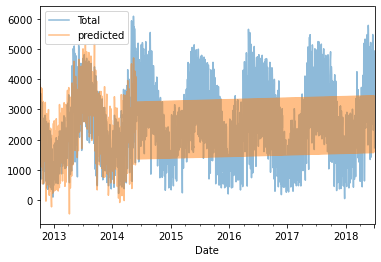

In [16]:
daily[['Total','predicted']].plot(alpha=0.5);

In [20]:
#this code estimate how much each feature contributes to the daily bicycle count:
params=pd.Series(model.coef_, index=X.columns)
params

Mon         1532.395965
Tue         1687.224172
Wed         1683.037343
Thur        1523.935819
Fri         1195.782692
Sat         -155.917357
Sun         -198.613154
holiday    -1334.561884
PRCP        -667.837724
dry day      649.637559
Temp (C)     111.509933
annual        51.735573
dtype: float64